In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier


# Load the pre-processed dataset
data = pd.read_csv("preprocessed_data.csv")


In [5]:


# Split the dataset into features (X) and the target variable (y)
X = data.drop(['Customer Status_Churned', 'Customer Status_Joined', 'Customer Status_Stayed'], axis=1)
y = data['Customer Status_Churned']  # Assuming you want to predict churn status

# Split the dataset into training and testing sets using cross-validation (500 rows)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Iteration  Accuracy                              Classification Report
0          1  0.688889  {'Stayed': {'precision': 0.7647058823529411, '...
1          2  0.644444  {'Stayed': {'precision': 0.7666666666666667, '...
2          3  0.744444  {'Stayed': {'precision': 0.8360655737704918, '...
3          4  0.688889  {'Stayed': {'precision': 0.8, 'recall': 0.75, ...
4          5  0.730337  {'Stayed': {'precision': 0.8, 'recall': 0.8253...


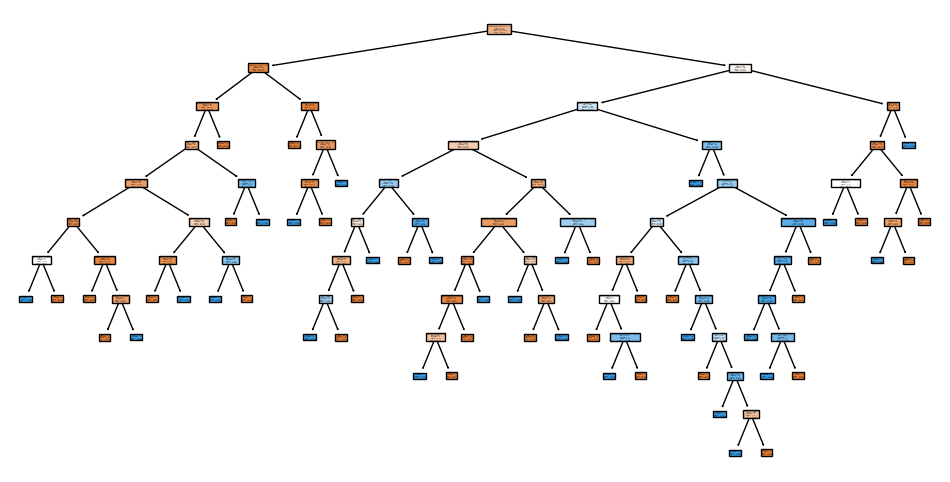

Average Accuracy: 0.70


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize lists to store results
results = []

# Define the number of cross-validation iterations
num_iterations = 5

# Create a Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=num_iterations, shuffle=True, random_state=42)

best_accuracy = 0
best_tree = None

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Decision Tree Classifier
    decision_tree = DecisionTreeClassifier(random_state=42)

    # Train the model on the training data
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_tree = decision_tree.predict(X_test)

    # Calculate accuracy
    accuracy_tree = accuracy_score(y_test, y_pred_tree)

    # Print the classification report
    classification_rep = classification_report(y_test, y_pred_tree, target_names=["Stayed", "Churned"], output_dict=True)

    # Store results in a dictionary
    result = {
        "Iteration": i + 1,
        "Accuracy": accuracy_tree,
        "Classification Report": classification_rep,
    }
    results.append(result)

    # Check if this tree has the highest accuracy
    if accuracy_tree > best_accuracy:
        best_accuracy = accuracy_tree
        best_tree = decision_tree

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display results in a tabular format
print(results_df)

# Display the Decision Tree with the highest accuracy
if best_tree:
    plt.figure(figsize=(12, 6))
    plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=["Stayed", "Churned"])
    plt.show()

# Calculate and print the average accuracy
average_accuracy = results_df["Accuracy"].mean()
print(f"Average Accuracy: {average_accuracy:.2f}")


In [10]:
from sklearn.tree import _tree

# Define a function to extract decision rules from a Decision Tree
def tree_to_rules(tree, feature_names):
    tree_ = tree.tree_

    def recurse(node, depth):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]

            # Left child
            if tree_.feature[node] == _tree.TREE_UNDEFINED:
                print(f"{depth*'  '}If {name} <= {threshold}:")
            else:
                print(f"{depth*'  '}If {name} <= {threshold}:")
                recurse(tree_.children_left[node], depth + 1)
                print(f"{depth*'  '}Else:")
                recurse(tree_.children_right[node], depth + 1)
        else:
            # Leaf node
            values = tree_.value[node][0]
            if values[0] > values[1]:
                prediction = "Stayed"
            else:
                prediction = "Churned"
            print(f"{depth*'  '}Predict {prediction}")

    recurse(0, 1)

# Extract decision rules from the trained Decision Tree
print("Decision Rules:")
tree_to_rules(decision_tree, X.columns)


Decision Rules:
  If Contract_Month-to-Month <= 0.5:
    If Customer ID <= 422.5:
      If Contract_One Year <= 0.5:
        If Customer ID <= 371.5:
          Predict Stayed
        Else:
          If Zip Code <= 91939.5:
            Predict Churned
          Else:
            If Customer ID <= 373.0:
              Predict Churned
            Else:
              Predict Stayed
      Else:
        If Number of Referrals <= 1.5:
          If Online Security <= 0.5:
            If City <= 16.5:
              If Total Charges <= 991.3250122070312:
                Predict Churned
              Else:
                Predict Stayed
            Else:
              If Zip Code <= 95606.0:
                Predict Stayed
              Else:
                If Age <= 39.0:
                  Predict Churned
                Else:
                  Predict Stayed
          Else:
            If Avg Monthly Long Distance Charges <= 7.849999904632568:
              Predict Stayed
            Else:
    

In [ ]:
from graphviz import Digraph

# Define a function to create a decision tree from extracted rules
def create_decision_tree(rules, dot=None, parent=None, previous_decision=None):
    if dot is None:
        dot = Digraph(comment="Decision Tree")

    for rule in rules:
        if rule.startswith("If "):
            condition = rule[3:]
            if previous_decision:
                dot.node(condition, condition, shape="box")
                dot.edge(previous_decision, condition)
                previous_decision = condition
            else:
                dot.node(condition, condition, shape="box")
                previous_decision = condition
        elif rule.startswith("Else"):
            dot.node("Else", "Else", shape="ellipse")
            dot.edge(previous_decision, "Else")
            previous_decision = "Else"
        elif rule.startswith("Predict"):
            prediction = rule[8:]
            dot.node(prediction, prediction, shape="ellipse")
            dot.edge(previous_decision, prediction)

    return dot

# Decision rules extracted from your code
decision_rules = [
    "If Contract_Month-to-Month <= 0.5:",
    "If Customer ID <= 422.5:",
    # Add the rest of the rules here...
]

# Create the decision tree graph
decision_tree_graph = create_decision_tree(decision_rules)

# Visualize the decision tree
decision_tree_graph


In [11]:
# Create a Neural Network Classifier (MLP)
neural_network = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model on the training data
neural_network.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nn = neural_network.predict(X_test)

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)


Neural Network Accuracy: 0.7078651685393258
